In [40]:
!pip install yfinance==0.1.67
!pip install pandas==1.3.3
!pip install requests==2.26.0
!mamba install bs4==4.10.0 -y
!pip install plotly==5.3.1


                  __    __    __    __
                 /  \  /  \  /  \  /  \
                /    \/    \/    \/    \
███████████████/  /██/  /██/  /██/  /████████████████████████
              /  / \   / \   / \   / \  \____
             /  /   \_/   \_/   \_/   \    o \__,
            / _/                       \_____/  `
            |/
        ███╗   ███╗ █████╗ ███╗   ███╗██████╗  █████╗
        ████╗ ████║██╔══██╗████╗ ████║██╔══██╗██╔══██╗
        ██╔████╔██║███████║██╔████╔██║██████╔╝███████║
        ██║╚██╔╝██║██╔══██║██║╚██╔╝██║██╔══██╗██╔══██║
        ██║ ╚═╝ ██║██║  ██║██║ ╚═╝ ██║██████╔╝██║  ██║
        ╚═╝     ╚═╝╚═╝  ╚═╝╚═╝     ╚═╝╚═════╝ ╚═╝  ╚═╝

        mamba (0.15.3) supported by @QuantStack

        GitHub:  https://github.com/mamba-org/mamba
        Twitter: https://twitter.com/QuantStack

█████████████████████████████████████████████████████████████


Looking for: ['bs4==4.10.0']

pkgs/main/linux-64       [>                   ] (--:--) No change
pkgs/main/linux-

In [41]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [42]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021--06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date, infer_datetime_format=True), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date, infer_datetime_format=True), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()

In [43]:
stock_data=yf.Ticker('TSLA')

In [44]:
stock_data_info=stock_data.info
tesla_data=stock_data.history(period='max')

In [45]:
tesla_data.reset_index(inplace=True)
tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29,3.800,5.000,3.508,4.778,93831500,0,0.0
1,2010-06-30,5.158,6.084,4.660,4.766,85935500,0,0.0
2,2010-07-01,5.000,5.184,4.054,4.392,41094000,0,0.0
3,2010-07-02,4.600,4.620,3.742,3.840,25699000,0,0.0
4,2010-07-06,4.000,4.000,3.166,3.222,34334500,0,0.0


## Question--2

In [46]:
url=' https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue'
data  = requests.get(url).text 
soup = BeautifulSoup(data,"html.parser")

In [47]:
tesla_revenue = pd.DataFrame(columns=["Date", "Revenue"])

for row in soup.find("tbody").find_all("tr"):
    col = row.find_all("td")
    date = col[0].text
    revenue = col[1].text
    tesla_revenue = tesla_revenue.append({"Date":date,"Revenue":revenue}, ignore_index=True)

In [48]:
tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(',|\$',"")
tesla_revenue.dropna(inplace=True)
tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]
tesla_revenue.tail

/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning:

The default value of regex will change from True to False in a future version.



<bound method NDFrame.tail of     Date Revenue
0   2020   31536
1   2019   24578
2   2018   21461
3   2017   11759
4   2016    7000
5   2015    4046
6   2014    3198
7   2013    2013
8   2012     413
9   2011     204
10  2010     117
11  2009     112
12  2008      15>

## question--5 Dinesh chandra gaddam

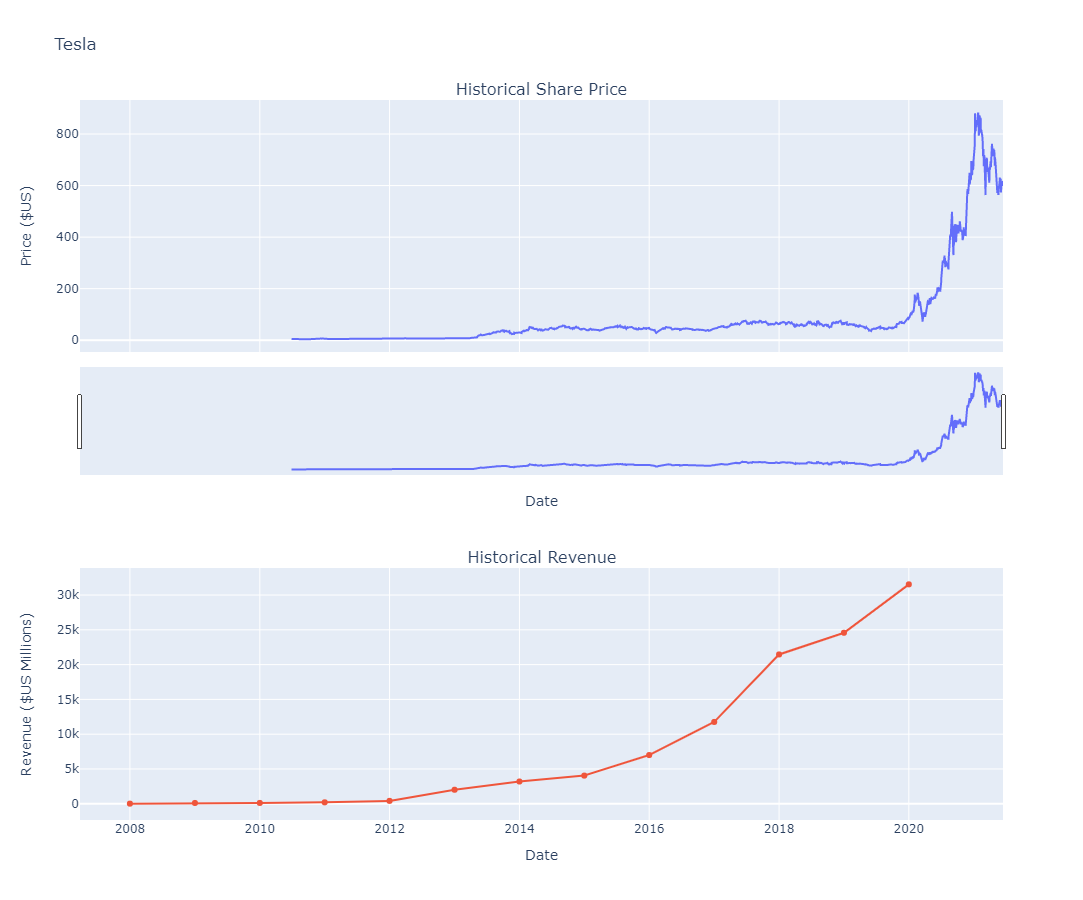

In [49]:
make_graph(tesla_data, tesla_revenue, 'Tesla')

## question--3
Dinesh Chandra Chandra

In [ ]:
stock_data=yf.Ticker('GME')

In [ ]:
stock_data_info=stock_data.info
gme_data=stock_data.history(period='max')

In [ ]:
gme_data.reset_index(inplace=True)
gme_data.head()

## Question--4
Dinesh Chandra Gaddam

In [ ]:
url=' https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue'
data  = requests.get(url).text 
soup = BeautifulSoup(data,"html.parser")

In [ ]:
gme_revenue = pd.DataFrame(columns=["Date", "Revenue"])

for row in soup.find("tbody").find_all("tr"):
    col = row.find_all("td")
    date = col[0].text
    revenue = col[1].text
    gme_revenue =gme_revenue.append({"Date":date,"Revenue":revenue}, ignore_index=True)

In [ ]:
gme_revenue["Revenue"] = gme_revenue['Revenue'].str.replace(',|\$',"")
gme_revenue.dropna(inplace=True)
gme_revenue =gme_revenue[gme_revenue['Revenue'] != ""]
gme_revenue.tail

##  question--6 =>>> Dinesh Chandra Gaddam

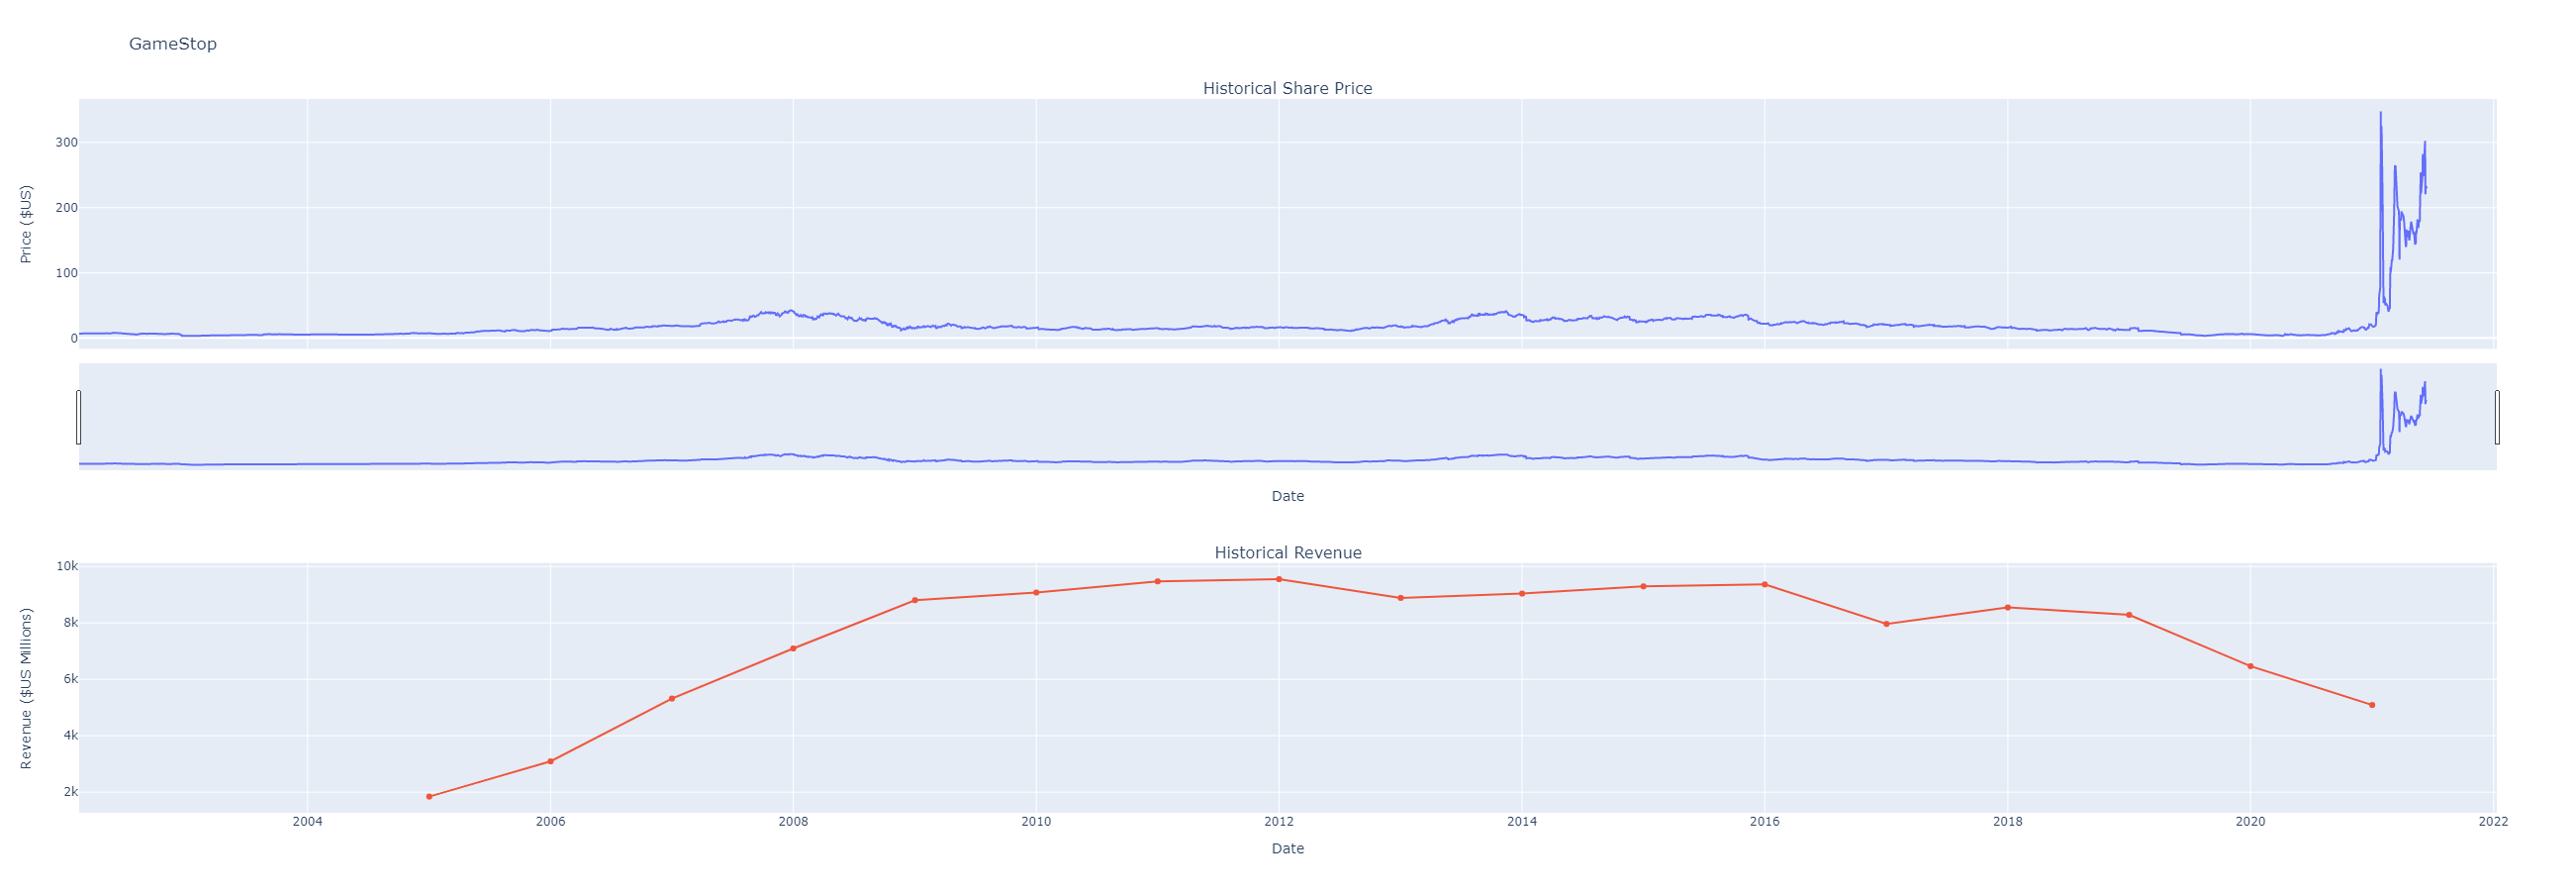

In [50]:
make_graph(gme_data, gme_revenue, 'GameStop')

In [ ]:

print("hello")